In [1]:
import sys
sys.path.insert(0, '..')
%cd ..


# from modelserver.server import ModelServer
from modelserver import server_test
from modelserver.visualization.visualizer import Visualizer
from modelserver.unimodal.visual import VisualMonitor

import cv2
import numpy as np

# import torch
import os
os.environ['SIBLE_DEVICES'] = '2,3'

%load_ext autoreload
%autoreload 2

/workspace/modelserver
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/workspace/modelserver/default-demo-app-c4bc3-b67061a9c4b1.json'

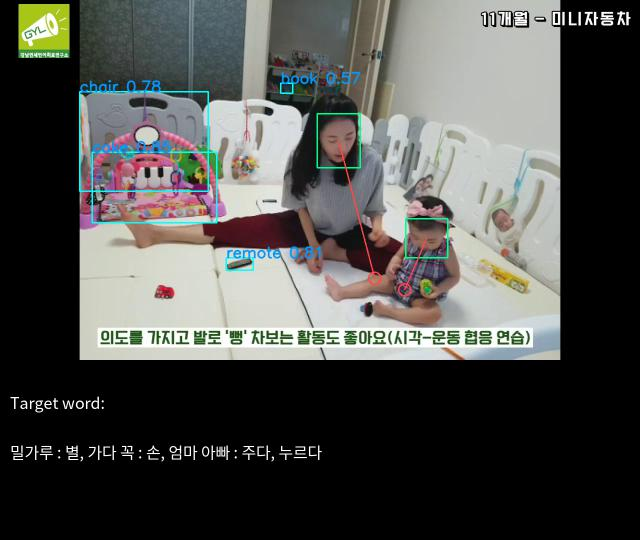

Process Process-1:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/workspace/modelserver/modelserver/server_test.py", line 353, in start
    server.run(visualize=True)
  File "/workspace/modelserver/modelserver/server_test.py", line 320, in run
    recommendations = self.update_context('audial', spoken_objects)
  File "/workspace/modelserver/modelserver/server_test.py", line 143, in update_context
    recommendations = self.get_recommendations()
  File "/workspace/modelserver/modelserver/server_test.py", line 174, in get_recommendations
    heap_candidates = heapq.nlargest(n*2, self.candidates[obj].items(), key = lambda x:x[1])
  File "/opt/conda/lib/python3.7/heapq.py", line 569, in nlargest
    result = [(key(elem), i, elem) for i, elem in zip(range(0, -n, -1), it)]


KeyboardInterrupt: 

In [3]:
from torch.multiprocessing import Process, Queue

url = "rtmp://video:1935/captivate/test"
# modelserver = ModelServer(url)
# modelserver.run(visualize=True)

queue = Queue()
    
server_process = Process(target=server_test.start, args=(url, queue))

server_process.start()

while True:
    queue.get(block=True)

